# Linear Regression
다음의 항목들에 대해서 학습합니다.

* 선형회귀(Linear Regression)
* 회귀모델 평가


## **1.환경준비**

* 라이브러리 로딩

In [1]:
# 데이터 다루는 라이브러리
import numpy as np
import pandas as pd

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt

# 머신러닝 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.metrics import *          # 모델 평가 함수들 전체(*)
from sklearn.linear_model import LinearRegression

## **2. 데이터 준비**

### (1) data loading

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'

data = pd.read_csv(path)  # csv 파일을 불러올때, 지정한 칼럼의 데이터만 가져오기
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


* 둘러보기

In [3]:
# 상/하위 몇개 행을 살펴 봅시다.
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# 각 칼럼의 타입을 살펴 봅시다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### (2) 데이터분할1 : x, y 나누기

In [5]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (3) 가변수화

In [6]:
cat_cols = ['ShelveLoc', 'US','Urban']

In [7]:
# 첫번째 가변수 제거
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,138,73,11,276,120,42,17,False,False,True,True
1,111,48,16,260,83,65,10,True,False,True,True
2,113,35,10,269,80,59,12,False,True,True,True
3,117,100,4,466,97,55,14,False,True,True,True
4,141,64,3,340,128,38,13,False,False,False,True


### (4) 데이터분할2 : train : validation 나누기

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

## 3.모델링 : 다중회귀

* 이번에는 다음의 변수로 예측하는 모델을 각각 만들어 봅시다.
    * model1 : Price + Age
    * model2 : Price + Age + ShelveLoc
    * model3 : 전체 변수

### (1) 모델1
* Price + Age

In [9]:
# 학습에 사용할 변수를 지정합니다.
features = ['Price','Age']
x_train1 = x_train[features]
x_val1 = x_val[features]

In [10]:
model1 = LinearRegression()
model1.fit(x_train1, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
print(list(x_train1))
print(model1.coef_, model1.intercept_)

['Price', 'Age']
[-0.05668523 -0.05057859] 16.87498339774416


In [12]:
pred1 = model1.predict(x_val1)

In [13]:
print('RMSE :', root_mean_squared_error(y_val, pred1))
print('MAE  :', mean_absolute_error(y_val, pred1))
print('r2 :', r2_score(y_val, pred1)) # r2 스코어가 높을수록 좋다 (설명 가능한 오차의 비율을 뜻함)

RMSE : 2.5176666485070442
MAE  : 2.053592574723096
r2 : 0.23901833455873955


### (2) 모델2
* Price + Age + ShelveLoc

In [14]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
268,123,57,0,66,105,39,11,False,True,False,True
108,107,79,2,488,103,65,16,False,False,False,True
21,134,29,12,239,109,62,18,True,False,True,False
231,132,69,0,123,122,27,11,False,True,False,False
33,114,38,13,317,128,50,16,True,False,True,True


In [15]:
# 학습에 사용할 변수를 지정합니다.
features = ['Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']
x_train2 = x_train[features]
x_val2 = x_val[features]

In [16]:
model2 = LinearRegression()
model2.fit(x_train2, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
print(list(x_train2))
print(model2.coef_, model2.intercept_)

['Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']
[-0.05952678 -0.04824324  5.00353761  1.99168349] 14.855540275889222


In [18]:
pred2 = model2.predict(x_val2)

In [19]:
print('RMSE :', root_mean_squared_error(y_val, pred2))
print('MAE  :', mean_absolute_error(y_val, pred2))
print('r2 :', r2_score(y_val, pred2))

RMSE : 1.8789210897060296
MAE  : 1.5399212833651519
r2 : 0.5761669476428513


### (3) 모델3

In [20]:
model3 = LinearRegression()
model3.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
print(list(x_train))
print(model3.coef_, model3.intercept_)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'US_Yes', 'Urban_Yes']
[ 9.14550155e-02  1.52896750e-02  1.11545812e-01  4.10916196e-04
 -9.49346042e-02 -4.32955626e-02 -2.39647930e-02  4.75921210e+00
  1.82116013e+00 -1.00667072e-01  9.23749941e-02] 5.788518293410998


In [22]:
pred3 = model3.predict(x_val)

In [23]:
print('RMSE :', root_mean_squared_error(y_val, pred3))
print('MAE  :', mean_absolute_error(y_val, pred3))
print('r2 :', r2_score(y_val, pred3))

RMSE : 1.1271151463198539
MAE  : 0.9415085484647858
r2 : 0.8474843845917948


### (4) 참조 : 릿지, 라쏘 모델링

In [48]:
from sklearn.linear_model import Ridge, Lasso

#### 1) 릿지 모델링

In [49]:
# 모델 선언
ridge_model = Ridge(alpha=1)    # alpha : 규제 강도, 수식에서의 lambda

# 학습
ridge_model.fit(x_train, y_train)

# 예측
pred_r = ridge_model.predict(x_val)

# 평가
print('RMSE :', root_mean_squared_error(y_val, pred_r))
print('MAE  :', mean_absolute_error(y_val, pred_r))
print('r2 :', r2_score(y_val, pred_r))

RMSE : 4.548162777573635
MAE  : 3.278944622830482
r2 : 0.7281279609395598


#### 2) Lasso 모델링

In [50]:
# 모델 선언
lasso_model = Lasso(alpha=1)    # alpha : 규제 강도

# 학습
lasso_model.fit(x_train, y_train)

# 예측
pred_l = lasso_model.predict(x_val)

# 평가
print('RMSE :', root_mean_squared_error(y_val, pred_l))
print('MAE  :', mean_absolute_error(y_val, pred_l))
print('r2 :', r2_score(y_val, pred_l))

RMSE : 5.169636909913485
MAE  : 3.7697445298847336
r2 : 0.6487529963225412


## 4.복습문제


### (1) Data Loading

In [27]:
data_path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(data_path)

**변수설명**
* medv  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== Target
* crim	범죄율
* zn	25,000 평방피트를 초과 거주지역 비율
* indus	비소매상업지역 면적 비율
* chas	찰스강변 위치(범주 : 강변1, 아니면 0)
* nox	일산화질소 농도
* rm	주택당 방 수
* age	1940년 이전에 건축된 주택의 비율
* dis	직업센터의 거리
* rad	방사형 고속도로까지의 거리
* tax	재산세율
* ptratio	학생/교사 비율
* lstat	인구 중 하위 계층 비율


### (2) 데이터 전처리

#### 1) x, y 분할

In [28]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

#### 2) 가변수화
* 이 데이터는 범주형 변수가 chas 인데, 이미 0,1로 되어 있음 --> 가변수화 불필요

#### 3) train, val 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= 0.3)

### (3) 모델링

#### 1) 모델 선언

In [30]:
model = LinearRegression()

#### 2) 학습

In [31]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


* 회귀 계수 열어보기

#### 3) 예측

In [36]:
pred = model.predict(x_val)

#### 4) 평가
* 성능 지표 : rmse, mae, mape, r2
* 성능 평가 결과를 보고 의미를 설명해 봅시다.

In [ ]:
print(f"RMSE: {root_mean_squared_error(y_val, pred)}")
print(f"MAE: {mean_absolute_error(y_val, pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, pred)}")
print(f"R2: {r2_score(y_val, pred)}")

'''
모든 변수들을 이용하여 모델을 학습시킨 결과, 

MAPE가 0.17이므로, 실제 y_val의 값에 비해 model.predict()를 이용해 예측한 값이 평균적으로 17%의 오차를 보인다.
R2 Score는 약 0.72로, 전체 데이터 변동의 약 72%는 설명 가능하고, 나머지는 설명 불가능한 편차

또한 이 모델은 선형 모델이므로, 대부분의 데이터 패턴이 선형적인 관계로 나타내어진다고 할 수 있다. 
'''


RMSE: 4.581080423725956
MAE: 3.3170649389512157
MAPE: 0.1722132297537554
R2: 0.7241783338356187


### (4) [추가] ridge, lasso 모델링
* 궁금한 사람만 해보세요.
* alpha 값을 변경할때 성능은 어떻게 달라지는지 실험해 봅시다.

In [64]:
# Ridge 모델링

def ridge_result(lam, log):
    ridge_model = Ridge(alpha=lam)
    ridge_model.fit(x_train, y_train)
    ridge_pred = ridge_model.predict(x_val)
    
    rmse = root_mean_squared_error(y_val, ridge_pred)
    mae = mean_absolute_error(y_val, ridge_pred)
    mape = mean_absolute_percentage_error(y_val, ridge_pred)
    r2 = r2_score(y_val, ridge_pred)
    if log==True:
        print(f"RMSE: {root_mean_squared_error(y_val, ridge_pred)}")
        print(f"MAE: {mean_absolute_error(y_val, ridge_pred)}")
        print(f"MAPE: {mean_absolute_percentage_error(y_val, ridge_pred)}")
        print(f"R2: {r2_score(y_val, ridge_pred)}")
    
    return [rmse, mae, mape, r2]

ridge_result(1, log=True)

RMSE: 4.548162777573635
MAE: 3.278944622830482
MAPE: 0.17061876319445576
R2: 0.7281279609395598


[4.548162777573635, 3.278944622830482, 0.17061876319445576, 0.7281279609395598]

In [61]:
# Lasso 모델링

def lasso_result(lam, log):
    ridge_model = Lasso(alpha=lam)
    ridge_model.fit(x_train, y_train)
    ridge_pred = ridge_model.predict(x_val)

    rmse = root_mean_squared_error(y_val, ridge_pred)
    mae = mean_absolute_error(y_val, ridge_pred)
    mape = mean_absolute_percentage_error(y_val, ridge_pred)
    r2 = r2_score(y_val, ridge_pred)
    
    if log == True:
        print(f"RMSE: {rmse}")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"R2: {r2}")

    return [rmse, mae, mape, r2]

lasso_result(1, log=True)

RMSE: 5.169636909913485
MAE: 3.7697445298847336
MAPE: 0.19208387226960175
R2: 0.6487529963225412


[5.169636909913485,
 3.7697445298847336,
 0.19208387226960175,
 0.6487529963225412]

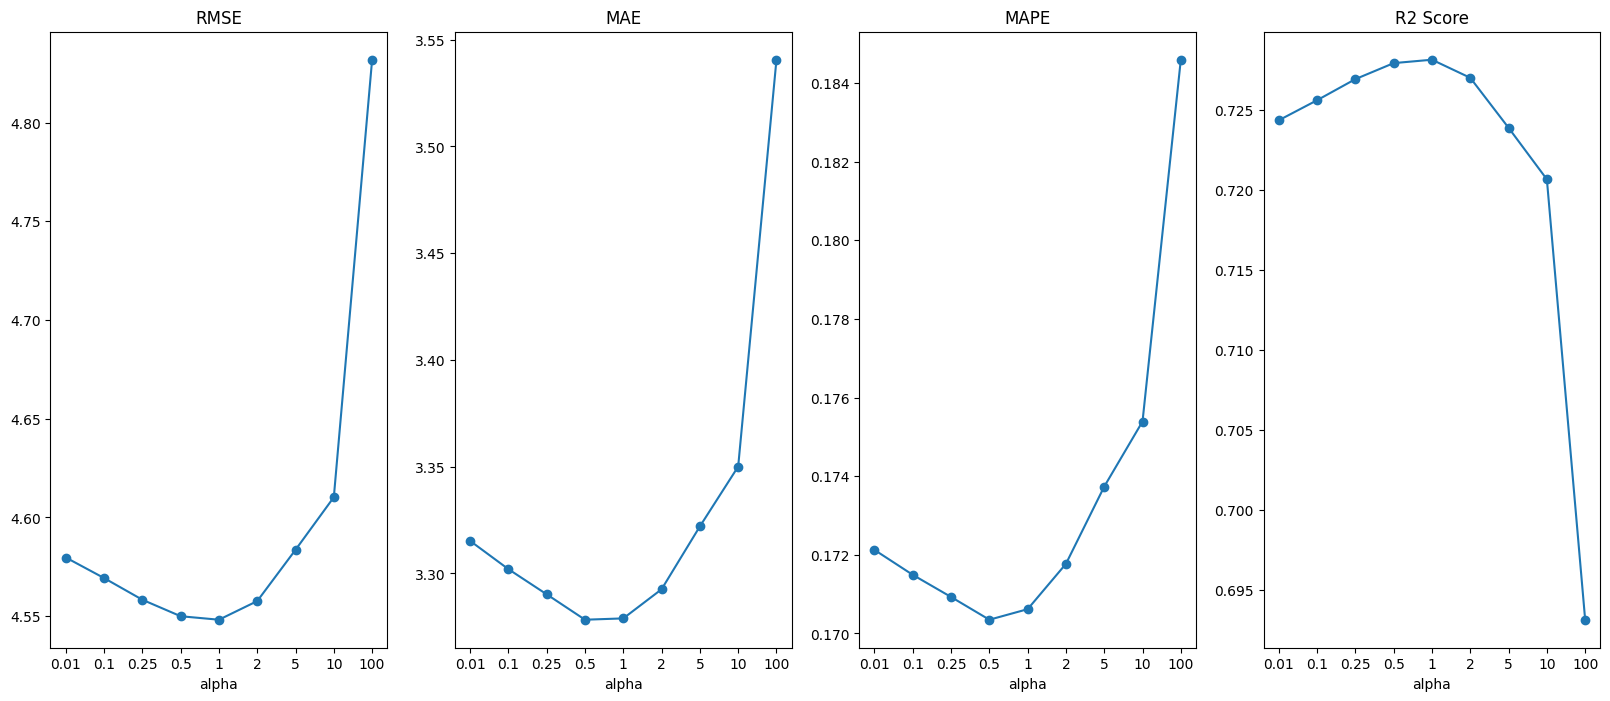

In [74]:
# Ridge 모델링에서 alpha 값 변환

alphas = [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 100]

rmses = []
maes = []
mapes = []
r2s = []

for i in alphas:
    results = ridge_result(i, log=False)
    rmses.append(results[0])
    maes.append(results[1])
    mapes.append(results[2])
    r2s.append(results[3])

plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.plot(range(len(alphas)), rmses, marker = 'o')
plt.title('RMSE')
plt.xticks(range(len(alphas)), alphas)
plt.xlabel('alpha')

plt.subplot(1, 4, 2)
plt.plot(range(len(alphas)), maes, marker = 'o')
plt.title('MAE')
plt.xticks(range(len(alphas)), alphas)
plt.xlabel('alpha')

plt.subplot(1, 4, 3)
plt.plot(range(len(alphas)), mapes, marker = 'o')
plt.title('MAPE')
plt.xticks(range(len(alphas)), alphas)
plt.xlabel('alpha')

plt.subplot(1, 4, 4)
plt.plot(range(len(alphas)), r2s, marker = 'o')
plt.title('R2 Score')
plt.xticks(range(len(alphas)), alphas)
plt.xlabel('alpha')


plt.show()

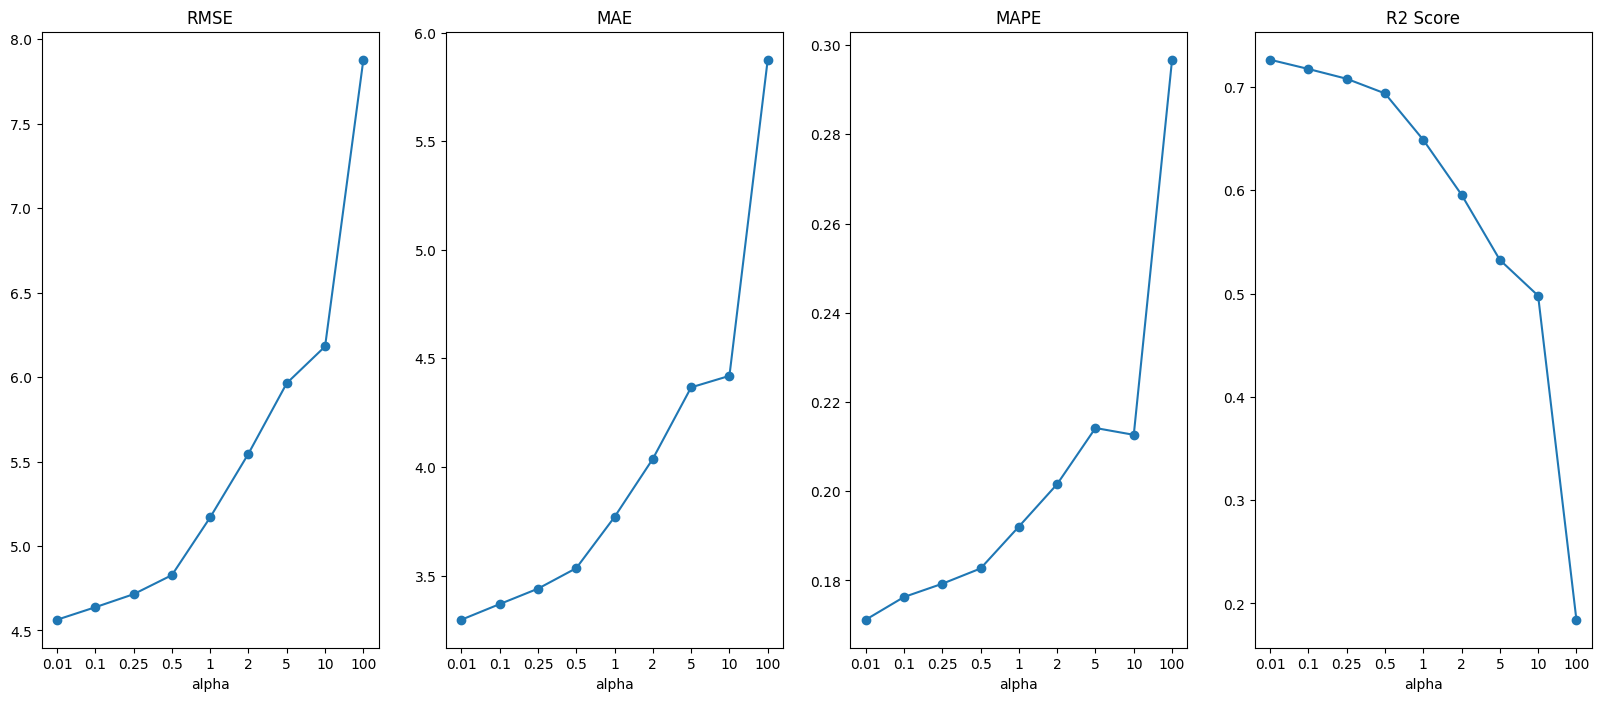

In [75]:
# Lasso 모델링에서 alpha 값에 따른 변화

alphas = [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 100]

rmses = []
maes = []
mapes = []
r2s = []

for i in alphas:
    results = lasso_result(i, log=False)
    rmses.append(results[0])
    maes.append(results[1])
    mapes.append(results[2])
    r2s.append(results[3])

plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.plot(range(len(alphas)), rmses, marker = 'o')
plt.title('RMSE')
plt.xticks(range(len(alphas)), alphas)
plt.xlabel('alpha')

plt.subplot(1, 4, 2)
plt.plot(range(len(alphas)), maes, marker = 'o')
plt.title('MAE')
plt.xticks(range(len(alphas)), alphas)
plt.xlabel('alpha')

plt.subplot(1, 4, 3)
plt.plot(range(len(alphas)), mapes, marker = 'o')
plt.title('MAPE')
plt.xticks(range(len(alphas)), alphas)
plt.xlabel('alpha')

plt.subplot(1, 4, 4)
plt.plot(range(len(alphas)), r2s, marker = 'o')
plt.title('R2 Score')
plt.xticks(range(len(alphas)), alphas)
plt.xlabel('alpha')


plt.show()